In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous time waveform representation
Last class we talked about continuous time signals, that we called **waveforms**.

How can we make a numerical representation of these  waveforms?

A numerical representation of a continuous signal uses  samples taken at time intervals sufficiently small to capture its fast variations.

Next code generates two different waveforms of the board we shared las class. Generata the the other 6 waveforms.
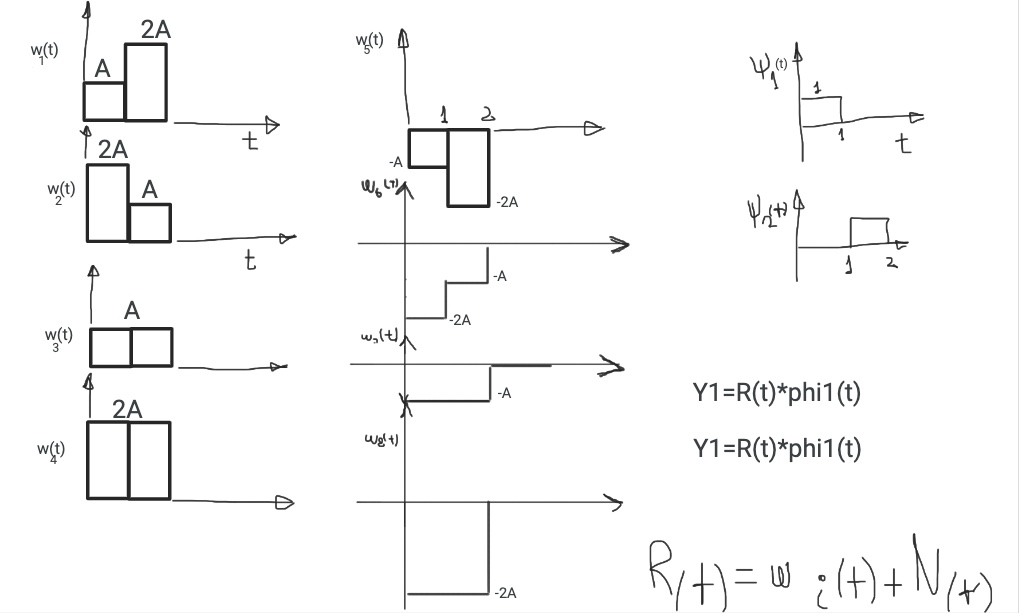



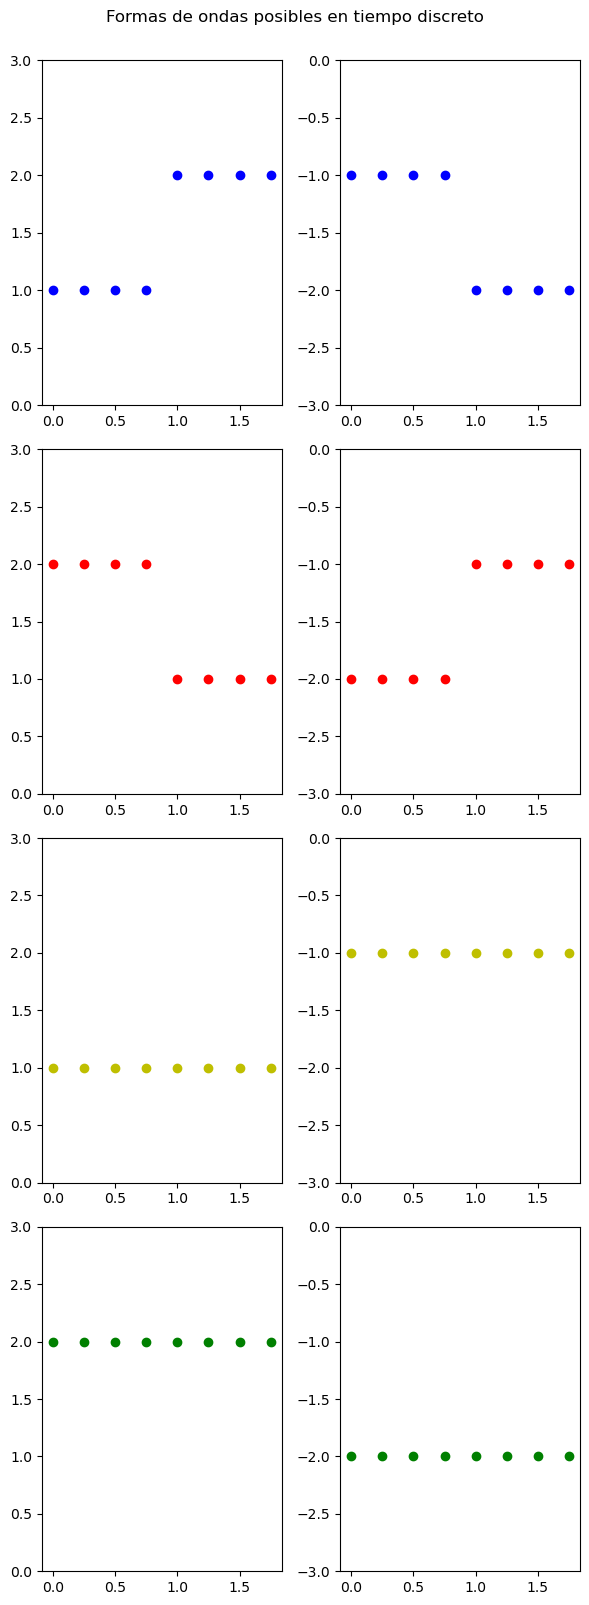

In [63]:
delta = 0.25                               # Delta tiempo
t = np.arange(0,2,delta)                   # Vector tiempo

w1 = np.array([1,1,1,1,2,2,2,2])           # Vector señal
w2 = np.array([2,2,2,2,1,1,1,1])           # Vector señal
w3 = np.array([1,1,1,1,1,1,1,1]) 
w4 = np.array([2,2,2,2,2,2,2,2])
w5 = np.array([-1,-1,-1,-1,-2,-2,-2,-2])
w6 = np.array([-2,-2,-2,-2,-1,-1,-1,-1])
w7 = np.array([-1,-1,-1,-1,-1,-1,-1,-1])
w8 = np.array([-2,-2,-2,-2,-2,-2,-2,-2])

# Voy a graficar en 4 filas y 2 columnas => 8 gráficos
fig,axs = plt.subplots(4,2,figsize=(6,16)) 
fig.suptitle('Formas de ondas posibles en tiempo discreto', y=1)

axs[0,0].set_ylim(0,3)                     # Para tener una misma escala en el eje y, y poder comparar
axs[0,0].plot(t,w1,'bo')                   # Gráficamos                       

axs[1,0].set_ylim(0,3)
axs[1,0].plot(t,w2,'ro')

axs[2,0].set_ylim(0,3)
axs[2,0].plot(t,w3,'yo')

axs[3,0].set_ylim(0,3)
axs[3,0].plot(t,w4,'go')

axs[0,1].set_ylim(-3,0)
axs[0,1].plot(t,w5,'bo')                       

axs[1,1].set_ylim(-3,0)
axs[1,1].plot(t,w6,'ro')

axs[2,1].set_ylim(-3,0)
axs[2,1].plot(t,w7,'yo')

axs[3,1].set_ylim(-3,0)
axs[3,1].plot(t,w8,'go')

plt.tight_layout()  # Ajuste automático de los espacios

## Orthonormal base
The previous waveforms can be generated by the linear combinations of $\psi_1(t)$ and $\psi_2(t)$. Let  A be 1, then

\begin{align}
     w_1(t) = 1 * \psi_1(t) + 2 * \psi_2(t)
\end{align}

where $c_{i,1} = 1$ and $c_{i,2} = 2$. From $w_1(t)$, the code $(c_{i,1}, c_{i,2})$ can be recovered by

\begin{align}
      c_{i,1} = \int w_1(t)\, \psi_1(t)\,dt = lim_{\Delta\to0}∑_{n=0}w_1(n\Delta)\psi_1(n\Delta)Δ\\
      c_{i,2} = \int w_1(t)\, \psi_2(t)\,dt
\end{align}


How can we do previous opperations by a numerical procedure?

The next code may be help you to answer last question

In [9]:
# Bases ortogonales y ortonormales:
phi_1 = np.array([1,1,1,1,0,0,0,0])
phi_2 = np.array([0,0,0,0,1,1,1,1])

# Realizo el producto punto entre la señal transmitida y las bases para obtener el código
ci1 = w1.dot(phi_1)*delta  # Esto puede realizarse como integral: multiplico el primer elemento con el primero + ...
print(ci1)

ci2 = w1.dot(phi_2)*delta
print(ci2)

1.0
2.0


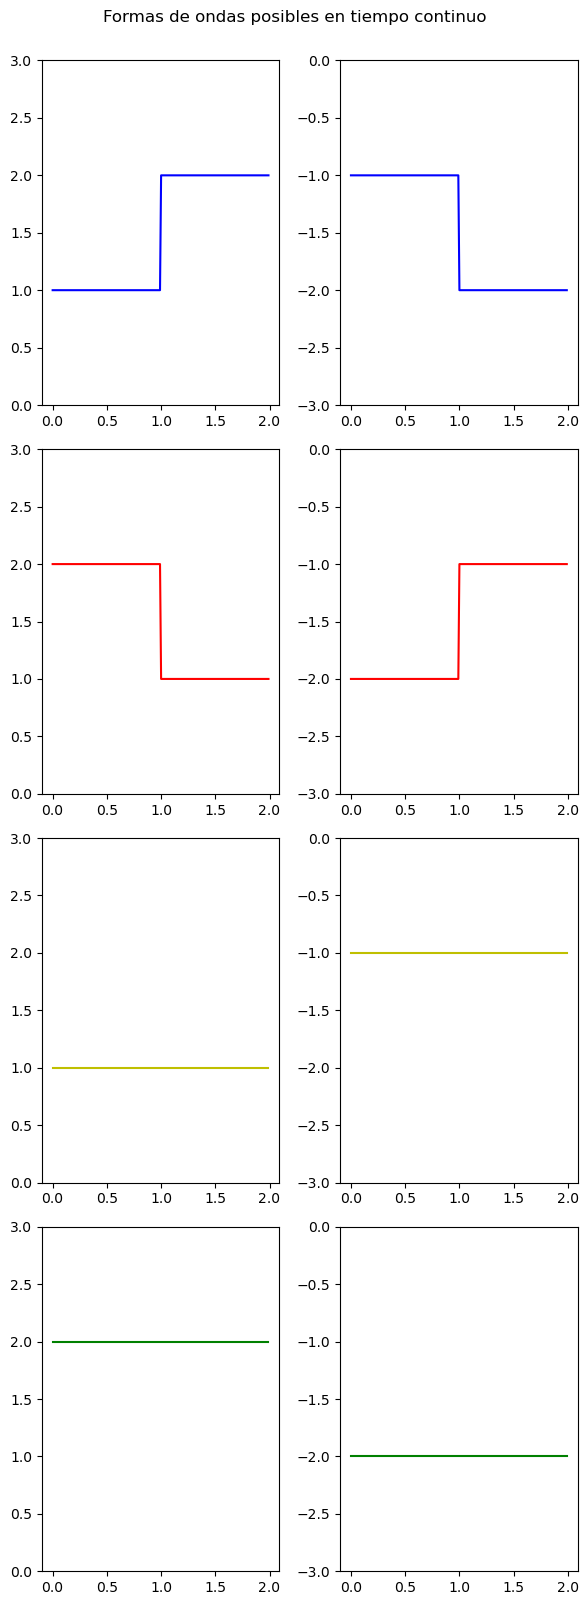

In [67]:
# Creo dos vectores para tiempo discreto
delta = 0.01
t1 = np.arange(0,1,delta)
t2 = np.arange(1,2,delta)
#w1 = np.concatenate(np.ones(len(t1))*1, np.ones(len(t2))*2, axis=None)

# Se crean las funciones base
waux1 = np.ones(len(t1)) * 1 # Se crea un vector escalón entre 0 y 1, de amplitud 1
waux2 = np.ones(len(t2)) * 2 # Se crea un vector escalón entre 1 y 2 de amplitud 2

# Se crea las posibles formas de onda a transmitir
w1 = np.concatenate((waux1,waux2), axis = None)
w2 = np.concatenate((waux2,waux1), axis = None)
w3 = np.concatenate((waux1,waux1), axis = None)
w4 = np.concatenate((waux2,waux2), axis = None)

# Se cambia el signo a las funciones base
waux1 *= -1 # Se crea un vector escalón entre 0 y 1, de amplitud -1
waux2 *= -1 # Se crea un vector escalón entre 1 y 2 de amplitud -2

w5 = np.concatenate((waux1,waux2), axis = None)
w6 = np.concatenate((waux2,waux1), axis = None)
w7 = np.concatenate((waux1,waux1), axis = None)
w8 = np.concatenate((waux2,waux2), axis = None)

# Gráfico
fig, axs = plt.subplots(4,2, figsize=(6,16))
fig.suptitle('Formas de ondas posibles en tiempo continuo', y=1)

axs[0,0].set_ylim(0,3)
axs[0,0].plot(np.concatenate((t1,t2), axis = None), w1, 'b')

axs[1,0].set_ylim(0,3)
axs[1,0].plot(np.concatenate((t1,t2), axis = None), w2, 'r')

axs[2,0].set_ylim(0,3)
axs[2,0].plot(np.concatenate((t1,t2), axis = None), w3, 'y')

axs[3,0].set_ylim(0,3)
axs[3,0].plot(np.concatenate((t1,t2), axis = None), w4, 'g')

axs[0,1].set_ylim(-3,0)
axs[0,1].plot(np.concatenate((t1,t2), axis = None), w5, 'b')

axs[1,1].set_ylim(-3,0)
axs[1,1].plot(np.concatenate((t1,t2), axis = None), w6, 'r')

axs[2,1].set_ylim(-3,0)
axs[2,1].plot(np.concatenate((t1,t2), axis = None), w7, 'y')

axs[3,1].set_ylim(-3,0)
axs[3,1].plot(np.concatenate((t1,t2), axis = None), w8, 'g')

plt.tight_layout()  # Ajuste automático de los espacios

## Implementing numericaly the inner product of continuous time functions

Let $\psi_1(t)\neq 0$  only at time interval T. Them

\begin{align}
    <\psi_1(t),\psi_1(t)> = \int \psi_1(t) \psi_1(t) dt ≈ = \lim_{N->∞}\frac{T}{N}\sum_{n=0} \psi_1(n\frac{T}{N})*\psi_1(n\frac{T}{N})
\end{align}

We can approximate numerically this integral as

\begin{align}
<\psi_1(t),\psi_1(t)> \approx
\frac{T}{N}\sum_{n=0} \psi_1(n\frac{T}{N})*\psi_1(n\frac{T}{N}) = <\overline\psi_1,\overline\psi_1>
\end{align}
with

\begin{align}
    \overline{\psi}_1(n) = \sqrt{T/N} \psi_1(n\frac{T}{N})
\end{align}

Observe that $\Delta = \frac{T}{N}$ is the sampling time interval of the continuous waveform.

Let do it at code

Inner produt = 0.9999999999999999


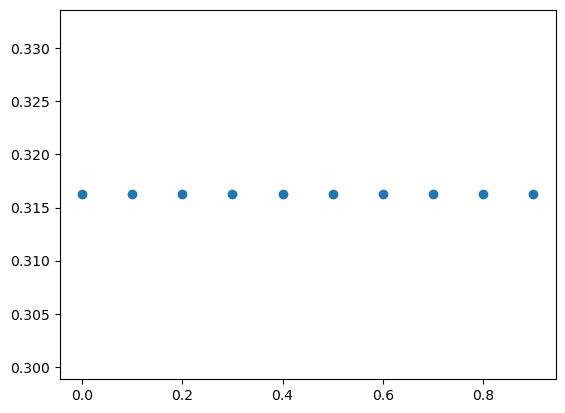

In [26]:
# Estamos visualizando como se representa númericamente la función base.

T = 1
N = 10                                   # Probar cambiando N y notar los cambios
Delta = T/N
t = np.arange(0,1,Delta)
psi1 = np.sqrt(T/N) * np.ones(N)

# Se gráfica la función base, que esta normalizada por el factor 'np.sqrt(T/N)' para que su producto punto sea unitario.
plt.plot(t, psi1,'o')

# Producto punto de la función base por sí misma.
print("Inner produt =",np.dot(psi1, psi1))

## Implementing the inner product with a filter

Observe that the convolution of $\psi_1(t)$ with $\psi_1(-t)$ at $t=0$ is the norm of $Ψ_1(t)$
\begin{align}
     \psi_1(t) \circledast \psi_1(-t) = \int \psi_1(τ)\psi_1(t+τ)  dτ
\end{align}
\begin{align}
     \psi_1(t) \circledast \psi_1(-t)|_{t=0} = <\psi_1(t),\psi_1(t)>
\end{align}



[0 2 5 2 0]


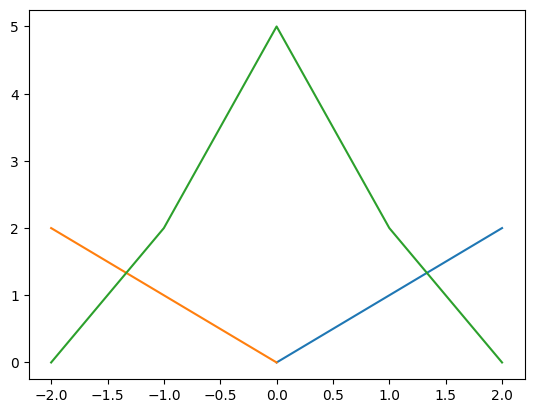

In [ ]:
# Señal discreta psi_1 (señal azúl)
t = [0, 1, 2]
psi_1 = [0, 1, 2]
plt.plot(t, psi_1)

# Construyó la señal espejo de psi_1
t_mirrowed = -1*np.flip(t)
psi_1_mirrowed = [2,1,0]
plt.plot(t_mirrowed ,psi_1_mirrowed)

# Realizo la convolución de las dos señales
np_convolve = np.convolve(psi_1, psi_1_mirrowed)
plt.plot([-2,-1,0,1,2], np_convolve)
print(np_convolve)

Observe in the previous plot that the value of convolution at $t=0$ is the norm of $\psi_1$, i.e. $<\psi_1, \psi_1>$. Shifting $\psi_1(-t)$ by T=2, $\psi_1(T-t)$ is now causal, and this leads to

\begin{align}
    \psi_1(t) \circledast \psi_1(T-t)|_{t=T}= <\psi_1(t),\psi_1(t)>
\end{align}

Taking this new consideration at our code we have:

[0 2 5 2 0]


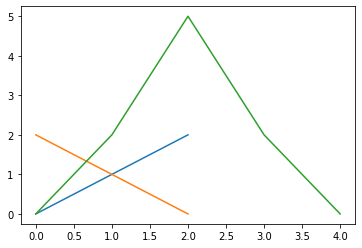

In [ ]:
# La señal discreta psi_1 es la misma que antes (señal azúl)
t = [0, 1, 2]
psi_1 = [0, 1, 2]
plt.plot(t, psi_1)

# La señal mirrow la desplazamos para que sea causal
T = 2
t_mirrowed_Tshifted = -1*np.flip(t) + T
psi_1_mirrowed = [2,1,0]
plt.plot(t_mirrowed_Tshifted ,psi_1_mirrowed)

# La convolución es una señal causal
np_convolve = np.convolve(psi_1, psi_1_mirrowed)
plt.plot([0,1,2,3,4], np_convolve)
print(np_convolve)